### Download the data
Let's download and uncompress our data and images here:

In [152]:
import platform
display(platform.system())
import os
file_download_link = ''
if os.name == 'nt':
    print('Please download your dataset here:', file_download_link)
else:
    # We need to first download the data here:
    file_download_link = 'https://www.dropbox.com/scl/fi/x4vhkglosags3qmg4h0p2/hw3data.zip?rlkey=kke6onzuc2rajohgislutjgg7&dl=0'
    !wget -O data.zip "$file_download_link" -o /dev/null
    !unzip data.zip > /dev/null

'Linux'

replace assets/flower.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [153]:
# If your data is on google drive then uncomment the code below to access
# your google drive.
#from google.colab import drive
#drive.mount('/content/drive')

## Running Keras on our Titanic dataset (15 points)

### Q1: We will now implement customization via Keras as the examples from Part 1 are specific to their respective datasets and are for example only to work through for learning purposes only. **They will not properly run if customized**

In [154]:
# Prerequisite library imports
import pandas as pd
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from keras.models import Model
# Let's reimport our data
df = pd.read_csv('./data/titanic/train_data.csv')
X = df.drop(['Unnamed: 0', 'PassengerId'], axis=1)
y = df['Survived']
X = X.drop(columns = 'Survived')

### 1.1) Above we use the keras libraries to build the model. Here we want to implement a form of scaling to your data either minmax normalization or standardization using the sklearn.preprocessing libraries. Justify why you chose one over the other. (5 points)

In [155]:
# Please use your scalarization of X here: then run the cell below to split your training and test data.
# Scalarization means normalizing or standardizing
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Used minmax normalization because it seems fare and age are already normalized and it doesnt seem like there are many outliers.

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)

(633, 14)

(633,)

### 1.2) Using the example for traindata above create a model using different activation functions by setting MYACTIVATIONFXN: (5 points)

Here is the example code you can use to build your own DNN after you check the shape of your X matrix
```python
# Hint! Start with model.add(Dense(units = 16, activation = 'relu', input_dim = ?))
# Make sure the input_dim parameter is set to the number of features in your X matrix.
MYACTIVATIONFXN = 'SOMEFXN'
model.add(Dense(units = 14, activation = MYACTIVATIONFXN, input_dim = ?))
```


In [157]:
# Let's initialize our model
model = Sequential() # Initialising the ANN

In [158]:
# Let's Check the shape of our data!
# This should match your input layer
X.shape

(792, 14)

In [159]:
# If you decide to initially use a sigmoid, make sure the number of units matches the number of targets
# in this case we only have 1 target so for sigmoid you need to set units to 1
# Please use the example code above in the hint.

In [160]:
# Write your model, and training here
MYACTIVATIONFXN = 'relu'

model.add(Dense(units = 16, activation = MYACTIVATIONFXN, input_dim = X_train.shape[1]))
model.add(Dense(units = 14, activation = MYACTIVATIONFXN))

model.add(Dense(units = 1, activation = 'sigmoid'))


### Now lets compile our model using the function compile
### Here we will use rmsprop as an optimizer and binary crossentropy as our loss function

In [161]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')


### Here we will run our ANN using the fit function using a batch size of 1 and 10 epochs (In the examples of Part 1, iterations are used instead of epochs)

In [162]:
# I have provided the code for you here:
# Feel free to play around with the code as you please
model.fit(X_train.astype('float'), y_train, batch_size = 1, epochs = 10)

Epoch 1/10
633/633 [==============================] - 2s 2ms/step - loss: 0.6184
Epoch 2/10
633/633 [==============================] - 1s 2ms/step - loss: 0.5236
Epoch 3/10
633/633 [==============================] - 1s 2ms/step - loss: 0.4738
Epoch 4/10
633/633 [==============================] - 1s 2ms/step - loss: 0.4502
Epoch 5/10
633/633 [==============================] - 2s 2ms/step - loss: 0.4437
Epoch 6/10
633/633 [==============================] - 1s 2ms/step - loss: 0.4380
Epoch 7/10
633/633 [==============================] - 1s 2ms/step - loss: 0.4328
Epoch 8/10
633/633 [==============================] - 1s 2ms/step - loss: 0.4332
Epoch 9/10
633/633 [==============================] - 1s 2ms/step - loss: 0.4362
Epoch 10/10
633/633 [==============================] - 1s 2ms/step - loss: 0.4309


### 1.3) How does the error (in terms of precission and recall) differ between your model and the example? Write in one paragraph or less how the error differs and why. (5 points)

In [163]:
# Hint! Use the predict function and threshold your results. 0.5 is reasonable.
# Please see the BCC jupyter notebook to see how to do this
import numpy as np
yhat_probs = model.predict(X_test, verbose=0)
yhat_classes = np.where(yhat_probs > 0.5, 1, 0)
TP = np.sum(np.logical_and(y_test == 1, yhat_classes == 1))
FP = np.sum(np.logical_and(y_test == 0, yhat_classes == 1))
FN = np.sum(np.logical_and(y_test == 1, yhat_classes == 0))

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print('Precision: '  ,precision)
print('Recall: ' ,recall)

Precision:  0.42138364779874216
Recall:  0.3522012578616352


For precision about 42.1% of predicted positives were correct out of all predicited positives. For recall, 30.2% predicted positives were correct from the model and therefore higher false negatives.   

## 2) Complex fit of flowers (30 points)

The cool stuf starts with more complex functions. The [Deep learning course from Andrew Ng](https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning) show a way to predict [Rose-functions](https://en.wikipedia.org/wiki/Rose_(mathematics)) using a model with multiple nodes. Lets try that as well!

First we need to import the data:

In [164]:
data = np.load('./data/rose/rose.npz')
X, Y = data['X'], data['Y']

To give a feel how it looks, we will first plot the rose, which has 7 petals:

In [165]:
import matplotlib.pyplot as plt
def testModel(X, Y, h=0.1, f=1.05):
    r = X.max()
    xmesh, ymesh = np.meshgrid(np.arange(-r*f, r*f+h, h), np.arange(-r*f, r*f+h, h))
    Z = model2.predict((np.c_[xmesh.ravel(), ymesh.ravel()]))
    Z = (Z > 0.5) * 1
    Z = Z.T.reshape(xmesh.shape)
    plt.contourf(xmesh, ymesh, Z, cmap=plt.cm.OrRd)
    plt.scatter(X[0, :], X[1, :], c=Y.flatten(), cmap=plt.cm.OrRd)

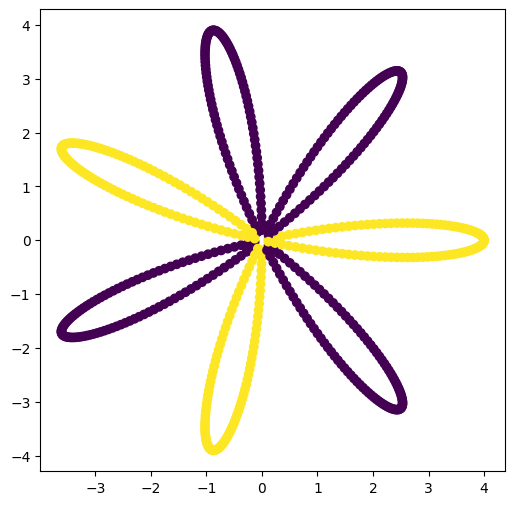

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(X[0,:], X[1,:], c=Y.flatten())

#### Q2: We will now implement customization via Keras as the examples in Part 1 are specific to their respective datasets and are for example only to work through for learning purposes only. They will not properly run if customized

In [168]:
data = np.load('./data/rose/rose.npz')
X, Y = data['X'].T, data['Y'].T
print(X.shape)
print(Y.shape)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X = scaler.fit_transform(X)

train_X, test_X, train_Y, test_Y = train_test_split(scaled_X, Y, train_size=0.8, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_X, train_Y, epochs=10, batch_size=32, validation_data=(test_X, test_Y))


(688, 2)
(688, 1)
Epoch 1/10
18/18 [==============================] - 1s 15ms/step - loss: 2.1560 - accuracy: 0.4164 - val_loss: 1.9978 - val_accuracy: 0.4855
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 1.9165 - accuracy: 0.4164 - val_loss: 1.7818 - val_accuracy: 0.4855
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 1.6995 - accuracy: 0.4164 - val_loss: 1.5683 - val_accuracy: 0.4855
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 1.4870 - accuracy: 0.4164 - val_loss: 1.3653 - val_accuracy: 0.4855
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 1.2885 - accuracy: 0.4164 - val_loss: 1.1882 - val_accuracy: 0.4855
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 1.1195 - accuracy: 0.4236 - val_loss: 1.0456 - val_accuracy: 0.5145
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.9852 - accuracy: 0.5182 - val_loss: 0.9378 - val_accuracy: 0.5145
E

### 2.1) Using the example above, try different number of nodes(units) and different activation functions. How does your loss change? (10 points)

As the nodes are increased, loss is decreased. the tanh function has less loss than the relu function but takes a little bit longer to evaluate.

In [173]:
model1 = keras.Sequential([
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='sigmoid')
])
model1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(train_X, train_Y, epochs=10, batch_size=32, validation_data=(test_X, test_Y))

model2 = keras.Sequential([
    keras.layers.Dense(units=32, activation='tanh'),
    keras.layers.Dense(units=128, activation='tanh'),
    keras.layers.Dense(units=64, activation='tanh'),
    keras.layers.Dense(units=10, activation='sigmoid')
])
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(train_X, train_Y, epochs=10, batch_size=32, validation_data=(test_X, test_Y))


Epoch 1/10
18/18 [==============================] - 2s 23ms/step - loss: 1.8470 - accuracy: 0.4855 - val_loss: 1.3242 - val_accuracy: 0.5145
Epoch 2/10
18/18 [==============================] - 0s 9ms/step - loss: 0.9997 - accuracy: 0.5836 - val_loss: 0.8426 - val_accuracy: 0.5145
Epoch 3/10
18/18 [==============================] - 0s 9ms/step - loss: 0.7446 - accuracy: 0.5836 - val_loss: 0.7932 - val_accuracy: 0.5145
Epoch 4/10
18/18 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.5873 - val_loss: 0.7307 - val_accuracy: 0.5145
Epoch 5/10
18/18 [==============================] - 0s 7ms/step - loss: 0.6731 - accuracy: 0.5891 - val_loss: 0.6852 - val_accuracy: 0.5145
Epoch 6/10
18/18 [==============================] - 0s 7ms/step - loss: 0.6626 - accuracy: 0.5964 - val_loss: 0.7119 - val_accuracy: 0.4855
Epoch 7/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6654 - accuracy: 0.5800 - val_loss: 0.6810 - val_accuracy: 0.5652
Epoch 8/10
18/18 [

### 2.2) Calculate your new error for 2 different models using classification report. Also, using the metrics, explain why you see the same or why you see a different error. (10 points)

model 1 (3 layers with ReLU activation) has 59% accuracy while model 2 (3 layers with TanH activation) has 59% accuracy. based on precision and recall both models have a high rate of false positives and false negatives. This shows with the low f1-score.

In [174]:
from sklearn.metrics import classification_report

# Model 1
model1_predictions = model1.predict(test_X)
model1_predicted_labels = np.argmax(model1_predictions, axis=1)
model1_report = classification_report(test_Y, model1_predicted_labels)
print("Model 1 Classification Report:")
print(model1_report)

# Model 2
model2_predictions = model2.predict(test_X)
model2_predicted_labels = np.argmax(model2_predictions, axis=1)
model2_report = classification_report(test_Y, model2_predicted_labels)
print("Model 2 Classification Report:")
print(model2_report)



5/5 [==============================] - 0s 3ms/step
Model 1 Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.76      0.66        71
           1       0.62      0.42      0.50        67

    accuracy                           0.59       138
   macro avg       0.60      0.59      0.58       138
weighted avg       0.60      0.59      0.58       138

5/5 [==============================] - 0s 3ms/step
Model 2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.21      0.35        71
           1       0.54      1.00      0.71        67

    accuracy                           0.59       138
   macro avg       0.77      0.61      0.53       138
weighted avg       0.78      0.59      0.52       138



### 2.3) Choose your best model! Now plot the new results using the plotting example shown above but using our newly trained best/coolest model. (10 points)

In [175]:
testModel(test_X, test_Y)
# not sure how to do this

16/16 [==============================] - 0s 2ms/step


ValueError: ignored

## 3) Cats vs not cats (40 points)

#### Q3: Your turn! Let's do this!!!

In [176]:
data = np.load('./data/cats/cats.npz')
X_train, y_train = data['Xtrain'].transpose(), data['Ytrain'].transpose()
X_test, y_test = data['Xtest'].transpose(), data['Ytest'].transpose()
display(X_train.shape)
display(y_train.shape)

# Let's initialize our model
model = Sequential() # Initialising the ANN

(209, 12288)

(209, 1)

### 3.1) Same as before, build a new model with different number of hidden layers, nodes and activation functions. Describe reason for any similarity or difference (20 points)

As epochs increases the loss gets lower with each generation. tanh is much more accurate than relu. More nodes increase accuracy as well as more hidden layers until it is basically overfitting.

In [177]:
# Try using different iterations using a simple layout like above. 10, 100, 1000 epochs.
# What happens with your loss?
# I have written the basics of the code for you
MYACTIVATIONFXN = 'tanh'
model.add(Dense(units = 128, activation = MYACTIVATIONFXN, input_dim = X_train.shape[1]))
model.add(Dense(units = 64, activation = MYACTIVATIONFXN))
model.add(Dense(units = 32, activation = MYACTIVATIONFXN))
model.add(Dense(units = 16, activation = MYACTIVATIONFXN))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
model.fit(X_train.astype('float'), y_train, batch_size = 1, epochs = 100)

Epoch 1/100
209/209 [==============================] - 5s 21ms/step - loss: 0.6665
Epoch 2/100
209/209 [==============================] - 4s 17ms/step - loss: 0.6723
Epoch 3/100
209/209 [==============================] - 4s 20ms/step - loss: 0.6631
Epoch 4/100
209/209 [==============================] - 3s 17ms/step - loss: 0.6577
Epoch 5/100
209/209 [==============================] - 4s 17ms/step - loss: 0.6545
Epoch 6/100
209/209 [==============================] - 4s 17ms/step - loss: 0.6563
Epoch 7/100
209/209 [==============================] - 4s 18ms/step - loss: 0.6511
Epoch 8/100
209/209 [==============================] - 4s 17ms/step - loss: 0.6533
Epoch 9/100
209/209 [==============================] - 3s 15ms/step - loss: 0.6542
Epoch 10/100
209/209 [==============================] - 4s 21ms/step - loss: 0.6527
Epoch 11/100
209/209 [==============================] - 4s 19ms/step - loss: 0.6539
Epoch 12/100
209/209 [==============================] - 4s 17ms/step - loss: 0.6516
E

#### Try using different layers and activation function with different number of nodes
What happens when you add convolutional layers? What happens to our training loss? </br>
After intitializing your mode make sure you rescale using: ``` keras.layers.Rescaling(1./255) ``` </br>
I will leave it up to you if you want to rescale prior to learning or in the model itself </br>
Here you will begin to add layers as well as max pooling. You typically want to do max pooling when you change the shape of your conv2d. Max pooling will focus on the most informative features and reduce the memory footprint </br>
This also requires reshaping form 1D to 2D. Hint: Look at the plotting fxn
```
model.add(Conv2D(32, kernel_size=3, activation='leakyrelu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D())
```
Make sure you flatten before going back into 1D
```
model.add(Flatten())
```
After you flatten, you can add your dense layers once again. </br></br>
<em> Note: you will have to convert your 1D array back into a 2D array prior to running your convlutional NN. Hint: Look at your plotting function down below!!! </em>

In [183]:

model = Sequential()
model.add(keras.layers.Rescaling(1./255))

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D())

model.add(Flatten())
X_train_reshaped = keras.layers.Reshape((64, 64, 3))(X_train)
X_test_reshaped = keras.layers.Reshape((64, 64, 3))(X_test)
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy')
model.fit(X_train_reshaped, y_train, batch_size=1, epochs=10)



Epoch 1/10
209/209 [==============================] - 16s 61ms/step - loss: 0.6740
Epoch 2/10
209/209 [==============================] - 17s 82ms/step - loss: 0.6644
Epoch 3/10
209/209 [==============================] - 12s 58ms/step - loss: 0.6677
Epoch 4/10
209/209 [==============================] - 11s 54ms/step - loss: 0.6607
Epoch 5/10
209/209 [==============================] - 12s 56ms/step - loss: 0.6583
Epoch 6/10
209/209 [==============================] - 11s 54ms/step - loss: 0.6590
Epoch 7/10
209/209 [==============================] - 12s 56ms/step - loss: 0.6495
Epoch 8/10
209/209 [==============================] - 12s 56ms/step - loss: 0.6640
Epoch 9/10
209/209 [==============================] - 12s 56ms/step - loss: 0.6561
Epoch 10/10
209/209 [==============================] - 12s 56ms/step - loss: 0.6581


## Prediction step. Make sure you use ```yhat_train``` and ```yhat_test``` variable names for your predictions!

In [184]:
yhat_train = model.predict(X_train_reshaped)
yhat_test = model.predict(X_test_reshaped)

2/2 [==============================] - 0s 23ms/step


### 3.2) Calculate your accuracy (10 points)
Here you will use both your classification report and your confusion matrix. </br>
Later you will be asked to calculate values manually. You are welcome to pull values from your reports.

In [185]:
# Hint! Use the predict function and threshold your results. 0.5 is reasonable.
# In your classification report since we are only predicting cats you will need to set the parameter labels
# labels=np.unique(yhat_test)
y_pred_train = (yhat_train >= 0.5).astype(int)
y_pred_test = (yhat_test >= 0.5).astype(int)

# Calculate the accuracy by comparing the predicted labels with the true labels
accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# Generate the classification report
report = classification_report(y_train, y_pred_train, labels=np.unique(y_train), zero_division=0)
print("Classification Report (Train):")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_pred_train, labels=np.unique(y_train))
print("Confusion Matrix (Train):")
print(cm)



Train Accuracy: 0.6555023923444976
Test Accuracy: 0.34
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       137
           1       0.00      0.00      0.00        72

    accuracy                           0.66       209
   macro avg       0.33      0.50      0.40       209
weighted avg       0.43      0.66      0.52       209

Confusion Matrix (Train):
[[137   0]
 [ 72   0]]


### 3.3) Calculate your precision and recall manually (10 points)

In [186]:
# Recall calculation
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
recall = TP / (TP + FN)
recall

array([1., 0.])

In [187]:
# Precision calculation
precision = TP / (TP + FP)
precision

<ipython-input-187-1e15a119830b>:2: RuntimeWarning: invalid value encountered in divide
  precision = TP / (TP + FP)


array([0.65550239,        nan])

### Let's plot!!!

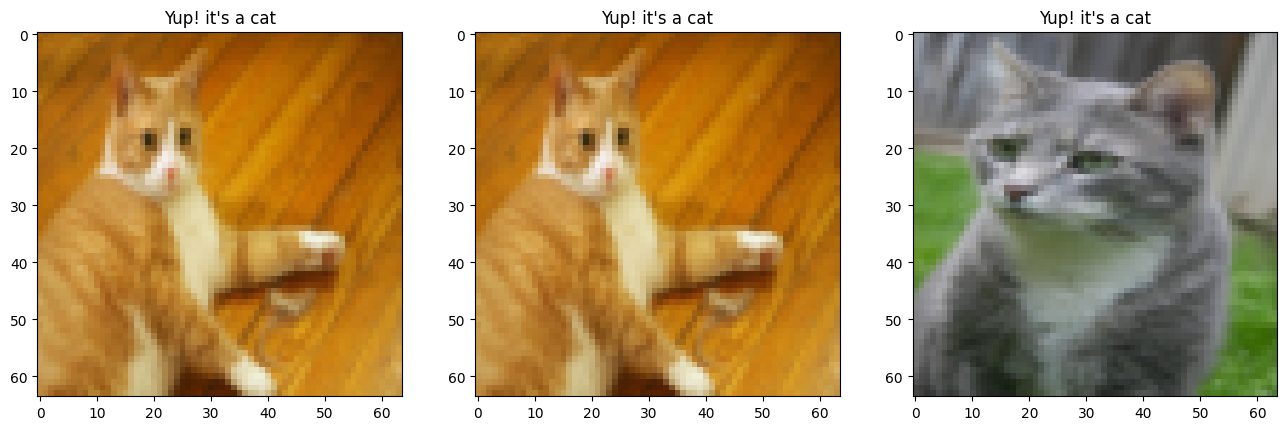

In [189]:
n = 3 # number of images to print
imgs = X_test.reshape([50, 64, 64, 3]) # here we reshape our images so that they are 2D again
fig, ax = plt.subplots(1, n, figsize=(16,8))
for ix in range(n):
    num = np.random.randint(imgs.shape[0]) # randomly selects from 51 images
    ax[ix].imshow(imgs[num])
    if yhat_test[num] == 0:
        ax[ix].set_title('This is clearly not a cat')
    else:
        ax[ix].set_title('Yup! it\'s a cat')

## 4) Collaborative Statement (5 points)
#### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

I did not collaborate with anyone on this assignment. Geoffrey Mohn

## Round up!

I hope you all had fun, writing your own ANN. In my opinon, writing these things from the ground up is the best way to learn how it actually works. I hope that you see that these systems are not magical, but simple matrix multiplications, unfortunately just a very lot of them. The most difficult part is of course the back propagation, where we need to calculate the gradients. Our simple ANNs are quite doable, but adding more different layers to them, can make it a bit more cumbersome. Still the essence is very similar to what we have done today.

My suggestion is to play around with these structures, rewrite parts of them, or even better, write your own from scratch!


Please let me know if you have any comments!

## Apendix

### Generating Rose Data

In [ ]:
def generateRoseData():
    k=7
    pointPerPetal = 100
    cutOff = 0.1
    r = 4

    theta = np.linspace(0,np.pi, pointPerPetal * k)
    xx = r * np.cos(k * theta) * np.cos(theta)
    yy = r * np.cos(k * theta) * np.sin(theta)
    cc = [np.ones(pointPerPetal) if ix % 3 == 0 else np.zeros(pointPerPetal) for ix in np.arange(k)]
    cc = np.roll(np.hstack(cc).astype(np.uint8), -pointPerPetal//2)
    x = xx[(xx**2 + yy**2)**0.5 > cutOff]
    y = yy[(xx**2 + yy**2)**0.5 > cutOff]
    col = cc[(xx**2 + yy**2)**0.5 > cutOff]
    X = np.vstack([x,y])
    Y = np.copy(col).reshape([1, -1])
    return X, Y
X, Y = generateRoseData()
np.savez_compressed('./data/rose/rose.npz', X=X, Y=Y)

### Processing Andrews CatvNotCat data

In [ ]:
# If you get an error here, install h5py via pip3 install h5py
import h5py

In [ ]:
# Data downloaded from:
# https://github.com/ridhimagarg/Cat-vs-Non-cat-Deep-learning-implementation
def processCatData():
    train_dataset = h5py.File("./data/cats/train_catvnoncat.h5", mode='r')
    Xtrain = np.array(train_dataset["train_set_x"])
    Y_train = np.array(train_dataset["train_set_y"])
    test_dataset = h5py.File("./data/cats/test_catvnoncat.h5", mode='r')
    Xtest = np.array(test_dataset["test_set_x"])
    Y_test = np.array(test_dataset["test_set_y"])
    X_train = Xtrain / 255
    X_test = Xtest / 255
    X_train = X_train.reshape(209, -1).T
    Y_train = Y_train.reshape(-1, 209)
    X_test = X_test.reshape(50, -1).T
    Y_test = Y_test.reshape(-1, 50)
    return X_train, X_test, Y_train, Y_test
Xtrain, Xtest, Ytrain, Ytest = processCatData()
np.savez_compressed('./data/cats/cats.npz', Xtrain=Xtrain, Xtest=Xtest, Ytrain=Ytrain, Ytest=Ytest)

# Credits
#### Edwin Solares - Updates to Part 1, Conversion to google colab, conversion to Keras and preprocessing data to work with Kears (Part 2).
#### Dennis Bakhuis - Custom ANN class and it's example exercises (Part 1). May the Fourth (be with you) 2020
https://linkedin.com/in/dennisbakhuis/ \
https://github.com/dennisbakhuis
